## EARLY PREDICTION OF DIABETES MELLITUS


In [ ]:
#import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Load the dataset
data = pd.read_csv("D:\\SKAY\\Projects\\KEEP\\VScode\\Diabetes\\Data\\diabetes.csv")


In [3]:
# Explore the dataset
print(data.head())
print(data.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Display basic statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
data.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Replace 0 values in specific columns with NaN
columns_with_zeros = ['Insulin', 'BMI', 'SkinThickness', 'BloodPressure', 'Glucose']

data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

In [7]:
# Display the number of missing values in each column
print("Missing values before dropping:")
print(data.isnull().sum())


Missing values before dropping:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


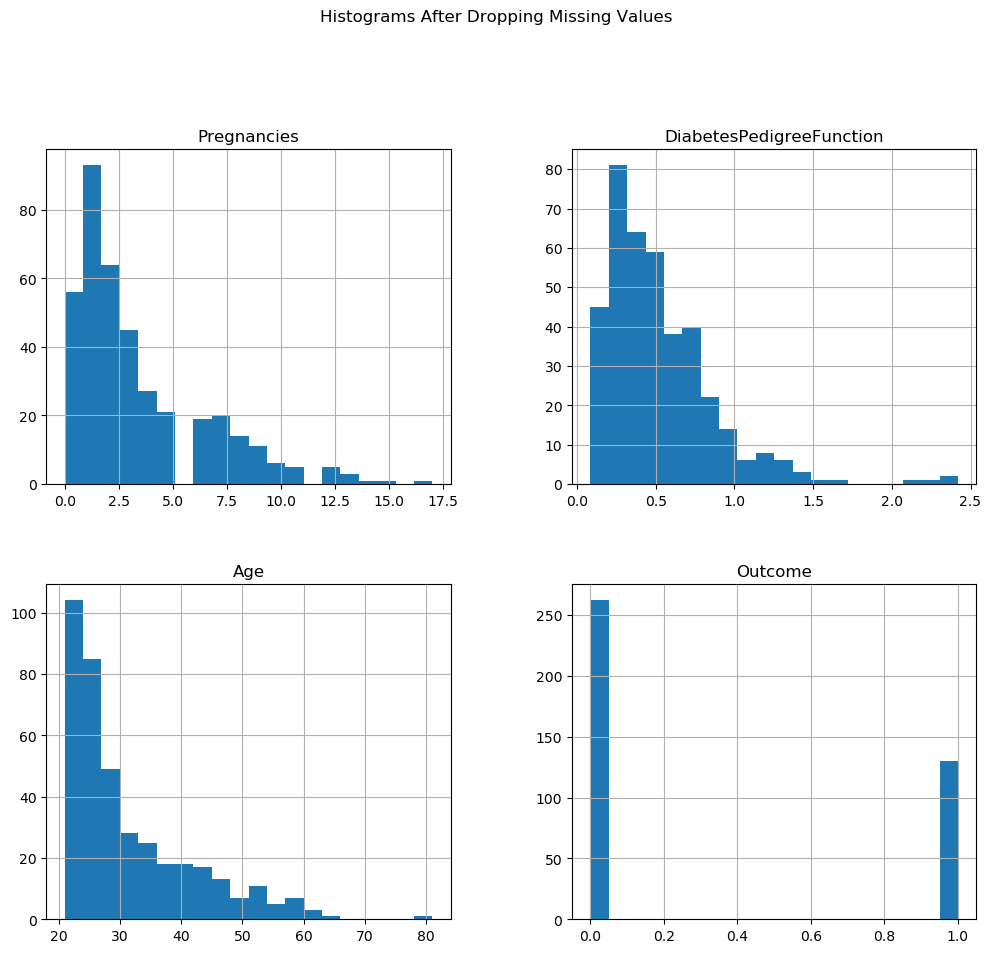

In [11]:


# Drop missing values
data_after_dropping = working_data.dropna()

# Display histograms after dropping missing values
data_after_dropping.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms After Dropping Missing Values", y=1.02)
plt.show()

In [12]:
# Display the number of missing values after dropping
print("\nMissing values after dropping:")
print(data_after_dropping.isnull().sum())


Missing values after dropping:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
#working data
#dataset is now for 395 data
len(data_after_dropping)

392

In [14]:
data_after_dropping.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


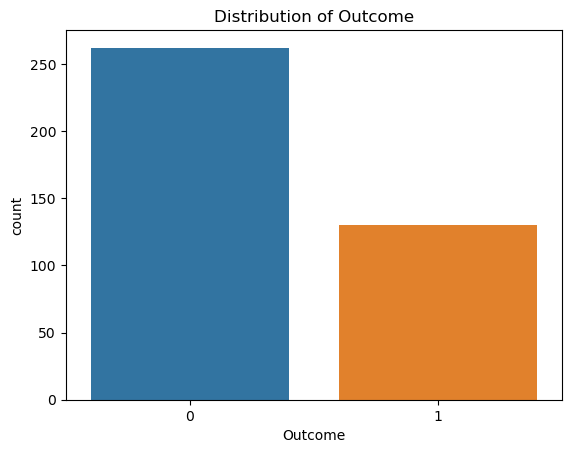

In [16]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=data_after_dropping)
plt.title('Distribution of Outcome')
plt.show()


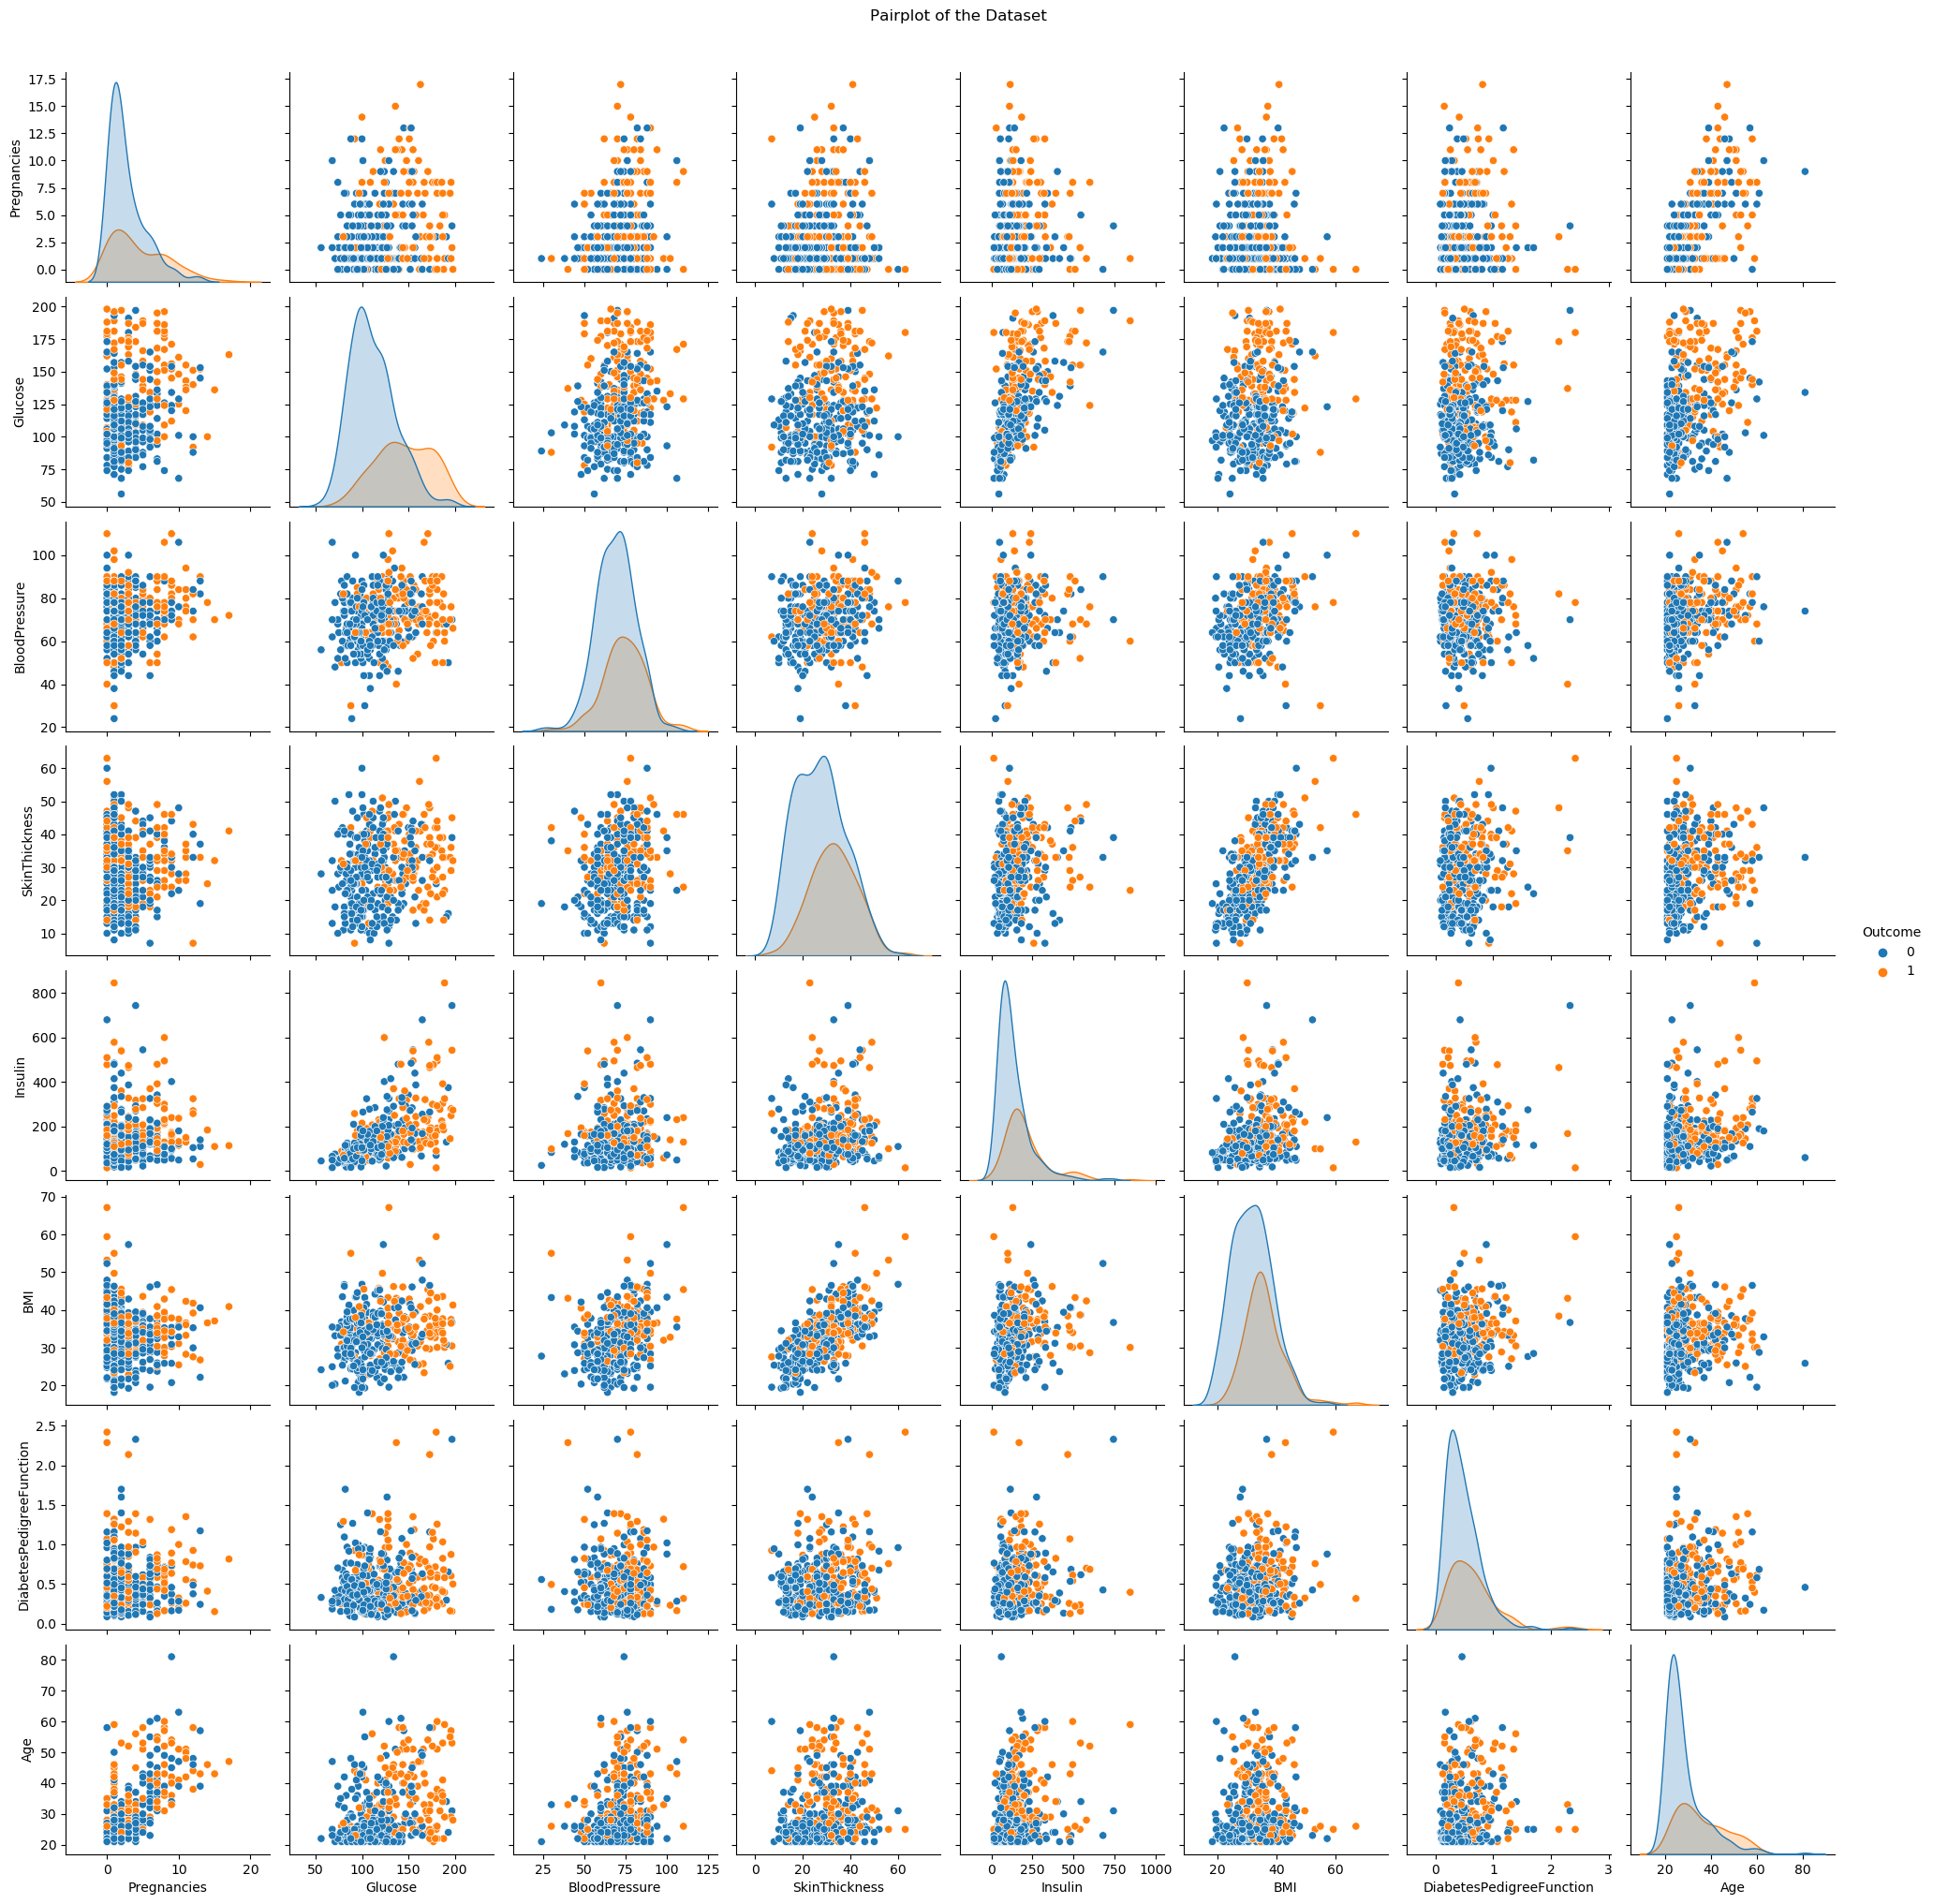

In [17]:
# Pairplot to visualize relationships between variables
sns.pairplot(data_after_dropping, hue='Outcome', diag_kind='kde')
plt.suptitle("Pairplot of the Dataset", y=1.02)
plt.show()

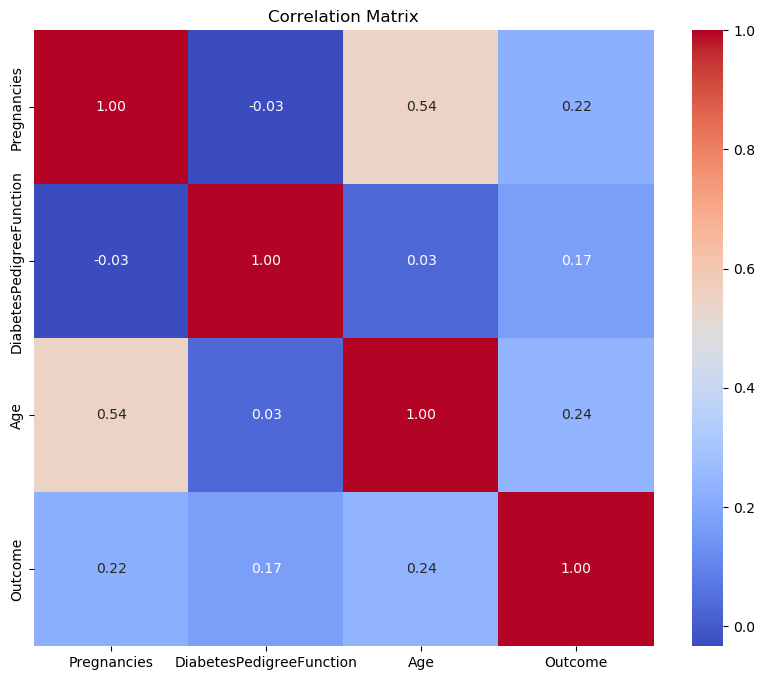

In [18]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

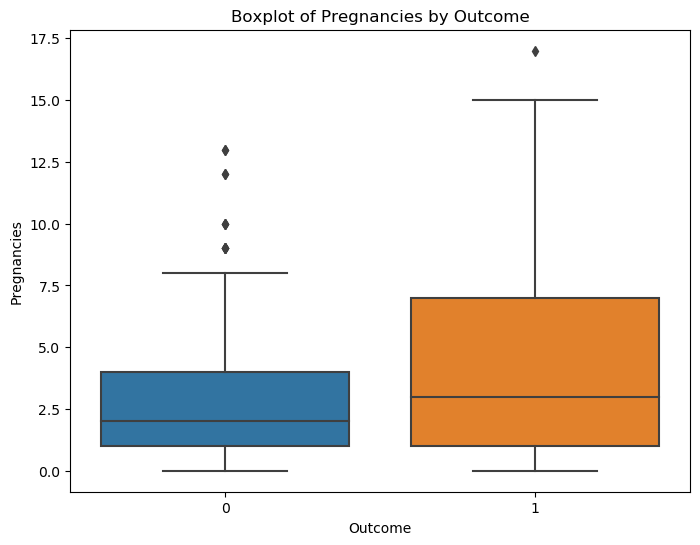

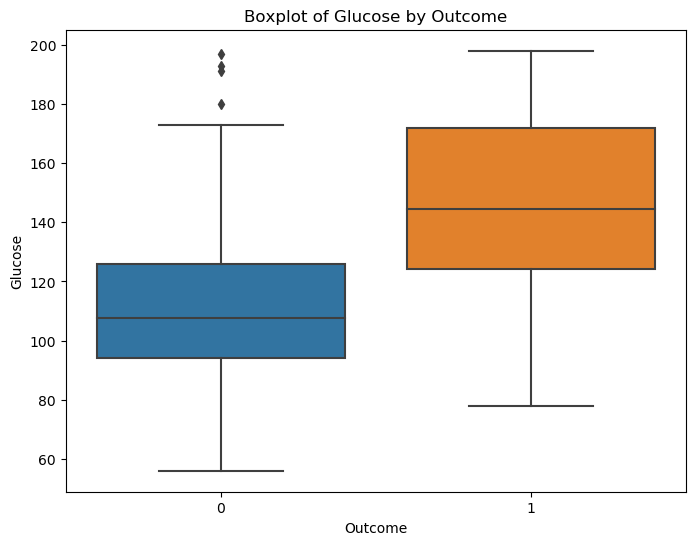

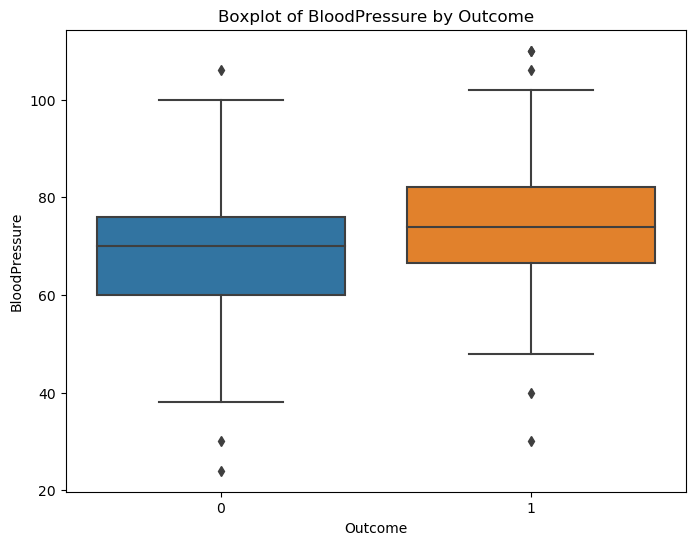

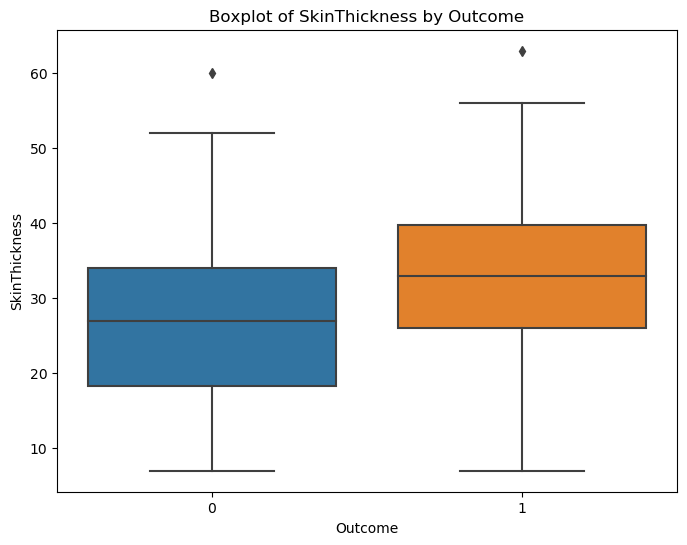

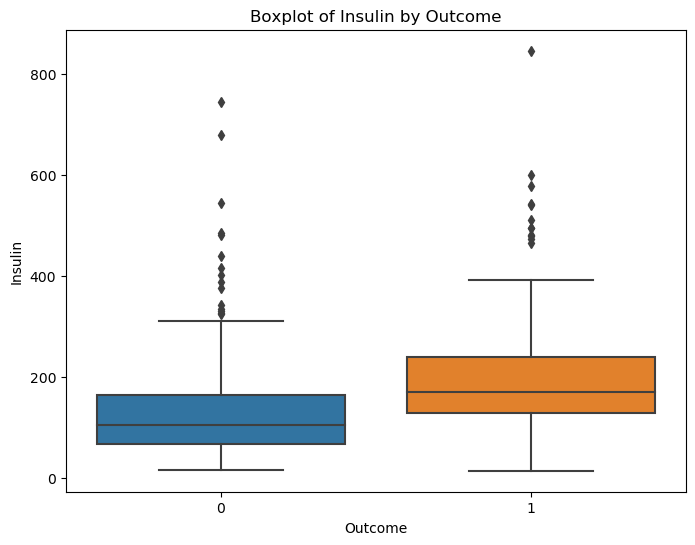

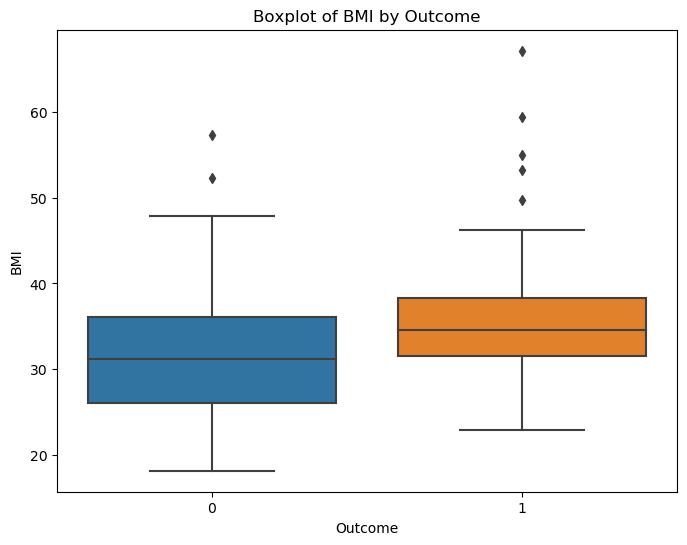

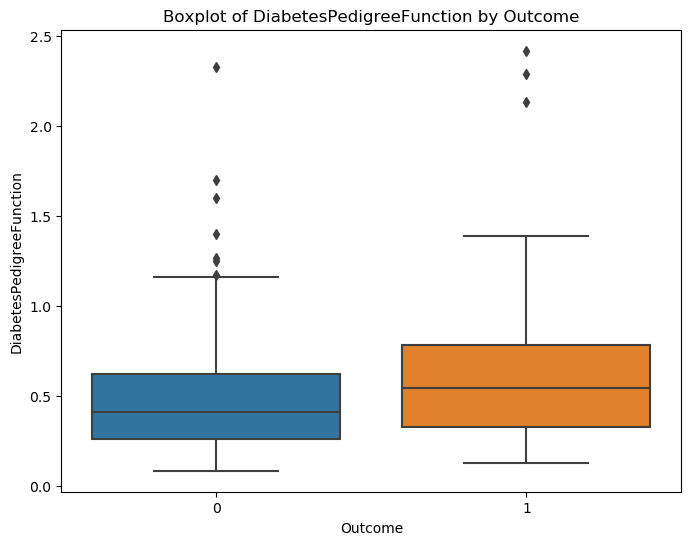

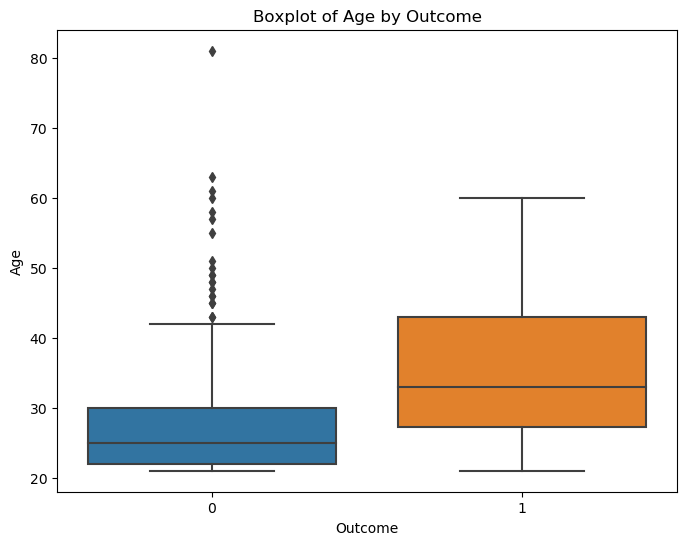

In [19]:
# Boxplot for numerical variables by Outcome
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=column, data=data_after_dropping)
    plt.title(f'Boxplot of {column} by Outcome')
    plt.show()


In [20]:
# Split the data into training and testing sets
X = data_after_dropping.drop("Outcome", axis=1)
y = data_after_dropping["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:

# Create a RandomForestClassifier (you can choose a different algorithm)
model = RandomForestClassifier(random_state=42)



In [22]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7848101265822784

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        52
           1       0.71      0.63      0.67        27

    accuracy                           0.78        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.78      0.78      0.78        79


Confusion Matrix:
 [[45  7]
 [10 17]]


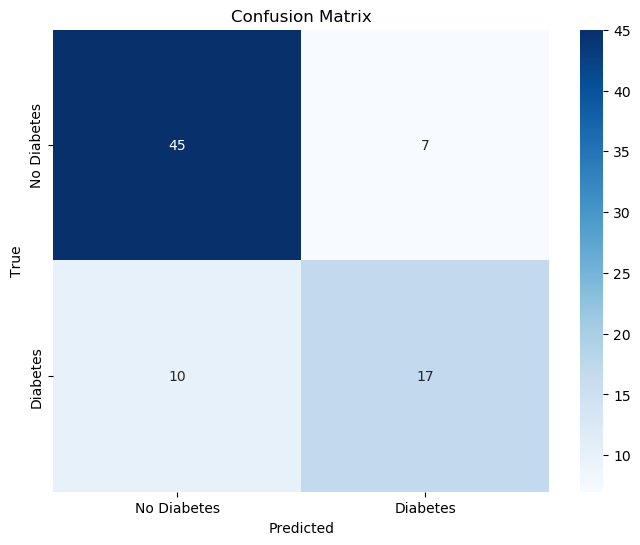

In [25]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


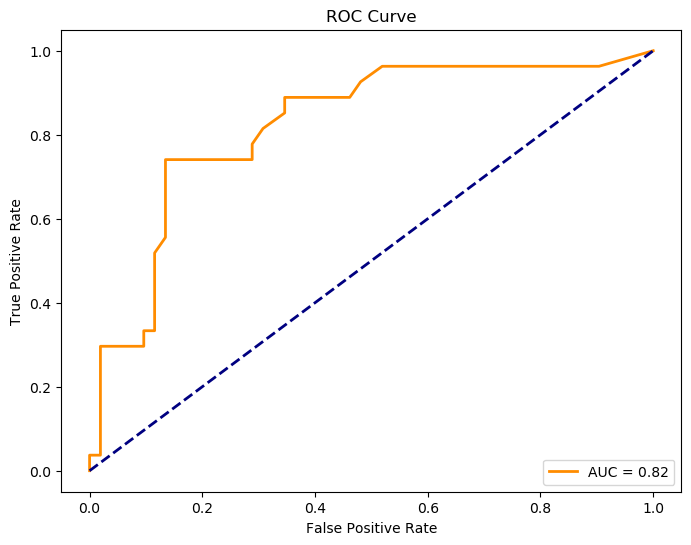

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score


# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [30]:
import joblib


# Save the trained model to a file
joblib.dump(model, 'Diabetes_model')

# Load the model later
#loaded_model = joblib.load('your_model_filename.pkl')


['Diabetes_model']

In [ ]:
# Load the model later
#loaded_model = joblib.load('your_model_filename.pkl')